✍ Для начала давайте поближе познакомимся с данными в таблицах. Напишите запросы, которые позволят ответить на вопросы ниже. В поле для ввода напишите число, которое является ответом на вопрос, а в ноутбук-решение запишите сами запросы.



In [1]:
#Импорт библиотек
import pandas as pd
import psycopg2

In [2]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
# Создаем соединение с заданными параметрами
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

cursor = connection.cursor()

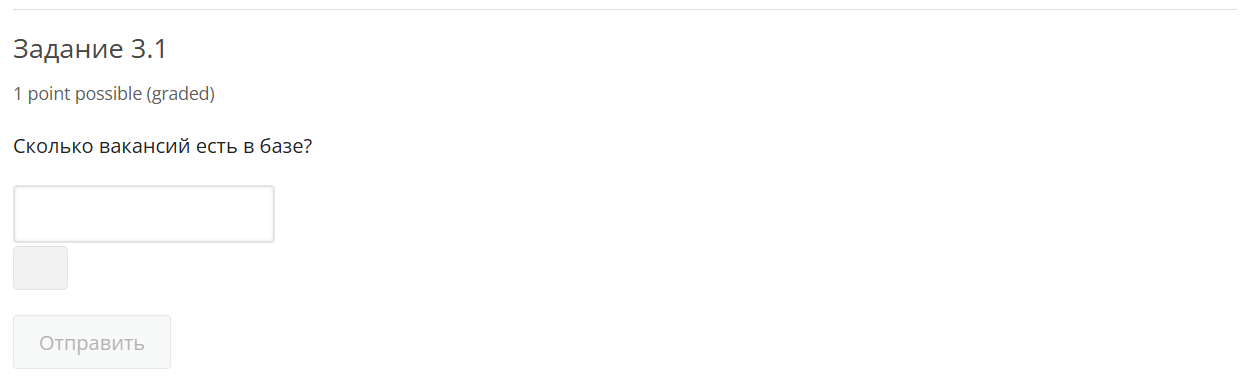

**Ответ:** 49197

In [4]:
# Запрос

# код запроса представляет из себя строковую переменную
n = 10
query = f'''select COUNT(*) 
            from VACANCIES 
         '''
cursor.execute(query)
result = cursor.fetchone()

In [5]:
vacancy_count = result[0]
print(vacancy_count)

49197


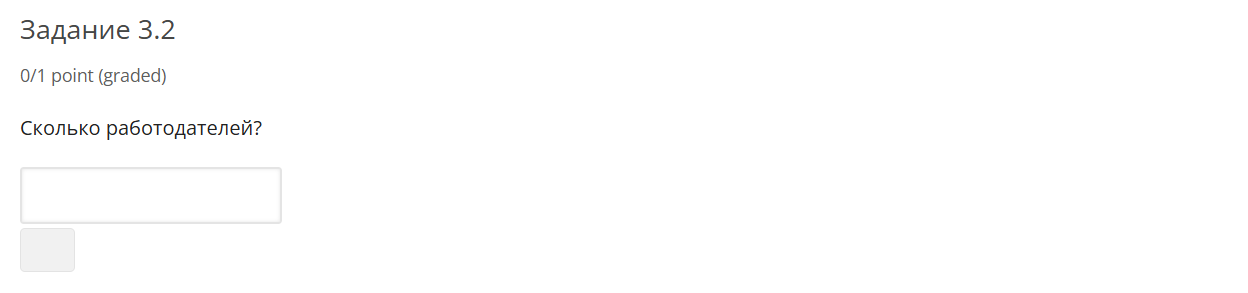

**Ответ:** 23501

In [6]:
n = 10
query = f'''select COUNT(*) 
            from EMPLOYERS 
         '''
cursor.execute(query)
result = cursor.fetchone()

In [7]:
employers_count = result[0]
print(employers_count)

23501


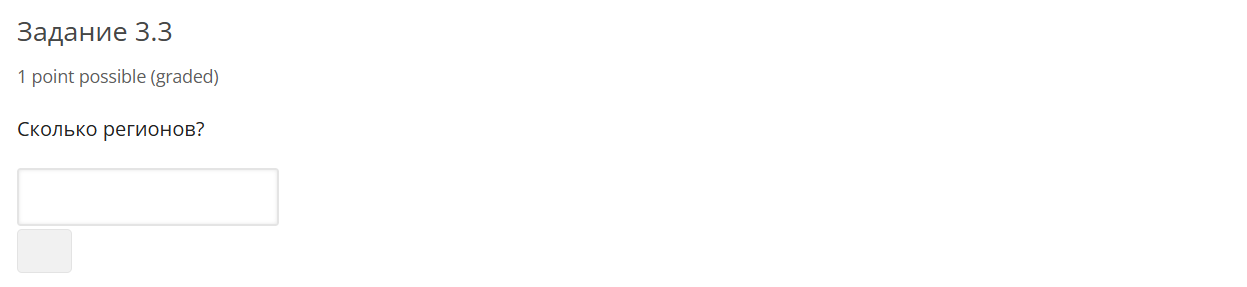

**Ответ**: 1362

In [8]:
n = 10
query = f'''select COUNT(*) 
            from AREAS 
         '''
cursor.execute(query)
result = cursor.fetchone()

In [9]:
areas_count = result[0]
print(areas_count)

1362


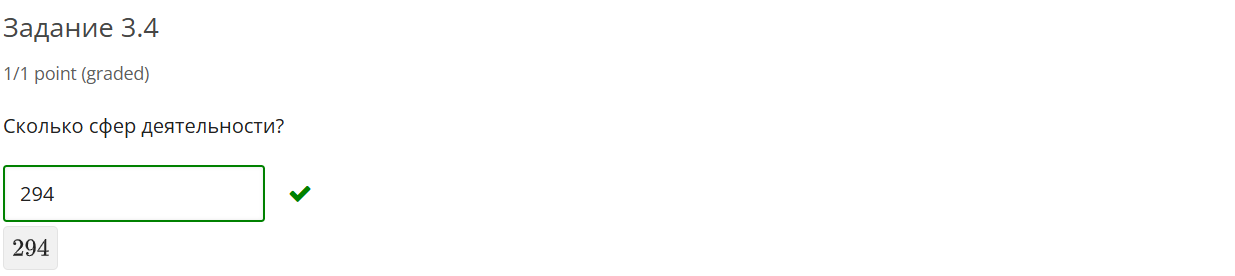

**Ответ:** 294

In [10]:
n = 10
query = f'''select COUNT(*) 
            from INDUSTRIES
         '''
cursor.execute(query)
result = cursor.fetchone()

In [11]:
industries_count = result[0]
print(industries_count)

294


## <center> **4. Детальный анализ вакансий**

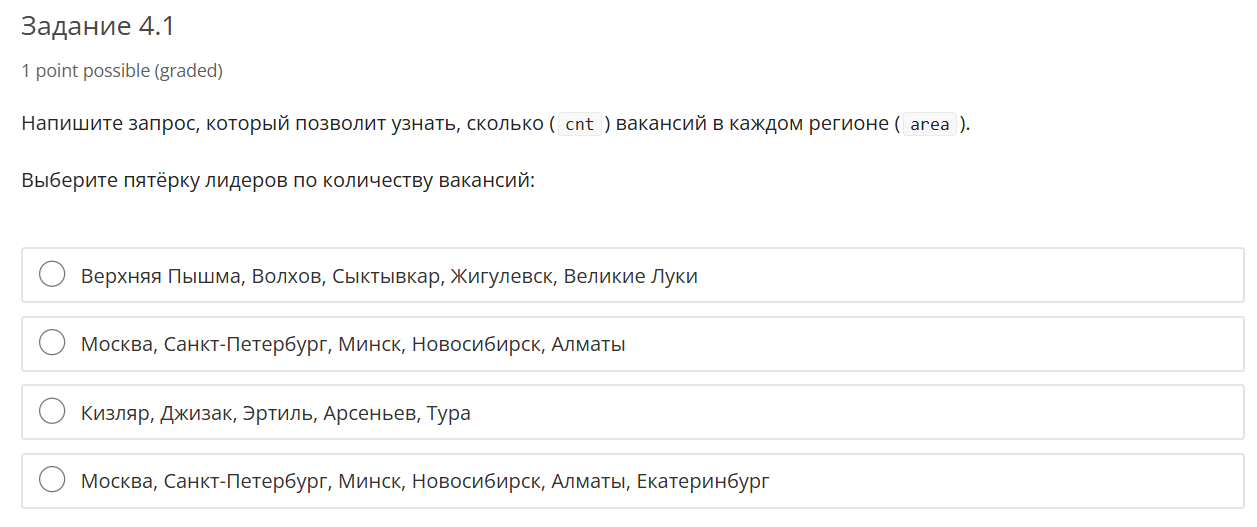

In [12]:
# SQL-запрос
query = """
SELECT 
    a.name AS area, 
    COUNT(v.id) AS cnt
FROM 
    AREAS a
LEFT JOIN 
    VACANCIES v ON a.id = v.area_id
GROUP BY 
    a.name
ORDER BY 
    cnt DESC;
"""


In [13]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


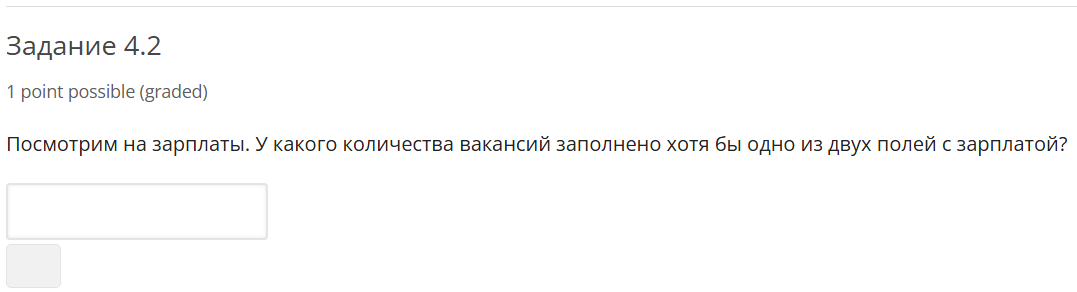

In [14]:
# SQL-запрос
query = """
SELECT 
    COUNT(*) as filled_salary_count
FROM 
    VACANCIES
WHERE 
    salary_from IS NOT NULL OR salary_to IS NOT NULL
"""

In [15]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,filled_salary_count
0,24073


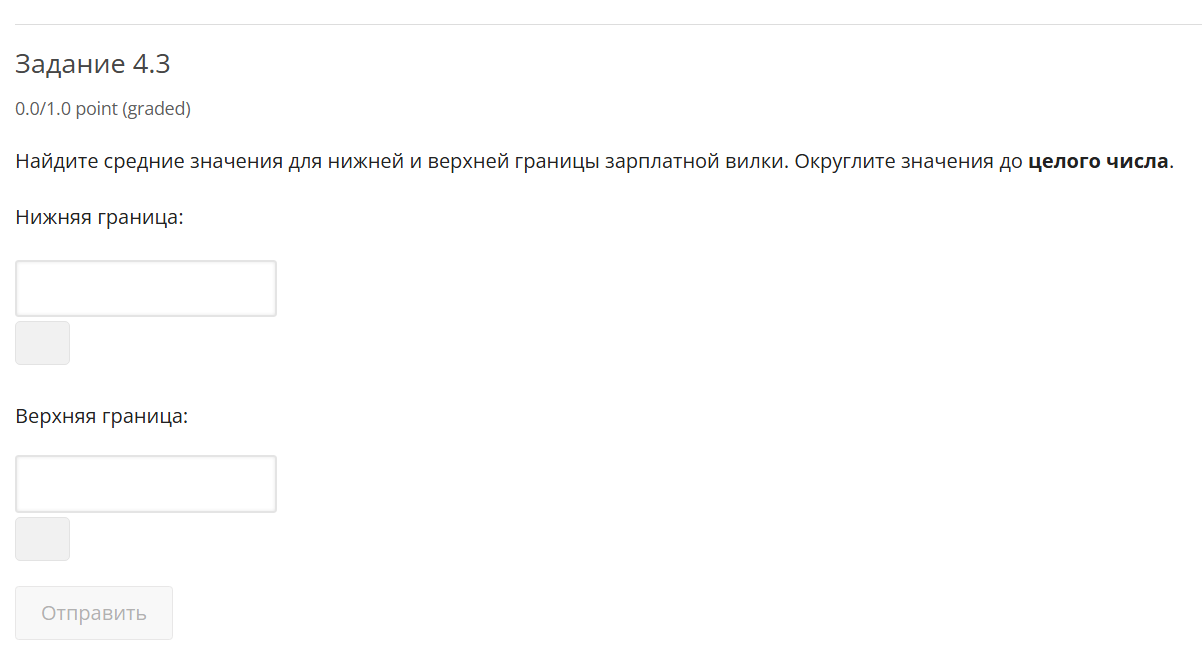

In [16]:
# SQL-запрос
query = """
SELECT 
    ROUND(AVG(salary_from)) as avg_salary_from,
    ROUND(AVG(salary_to)) as avg_salary_to
FROM 
    VACANCIES
"""

In [17]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


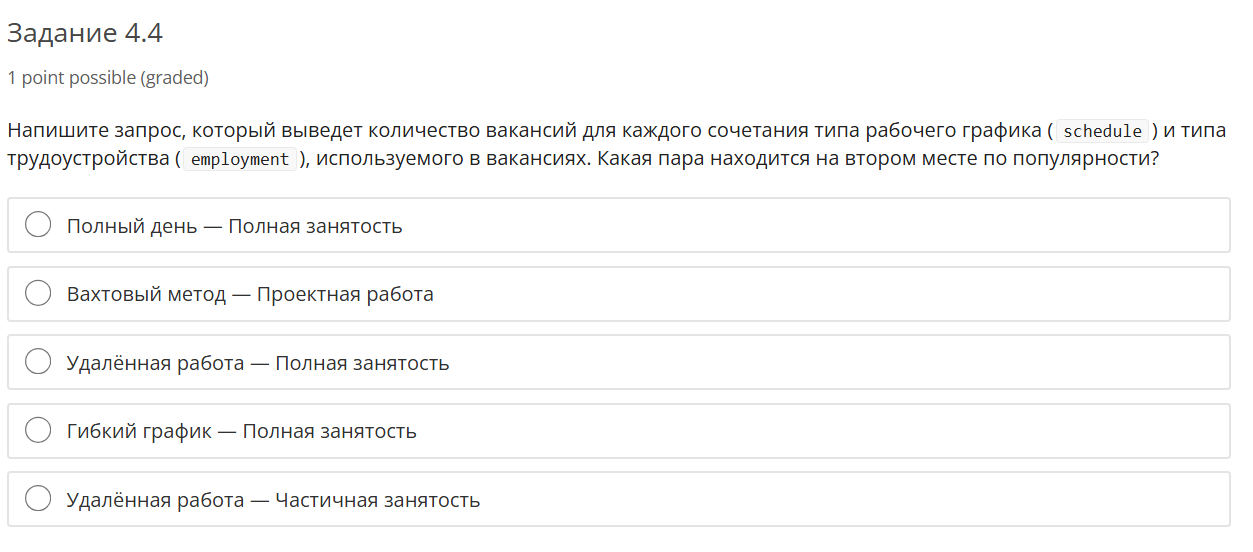

In [18]:
# SQL-запрос
query = """
SELECT
    schedule,
    employment,
    COUNT(*) AS vacancy_count
FROM 
    VACANCIES
GROUP BY
    schedule, employment
ORDER BY 
    vacancy_count DESC
OFFSET 1 LIMIT 1;
"""

In [19]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,schedule,employment,vacancy_count
0,Удаленная работа,Полная занятость,7802


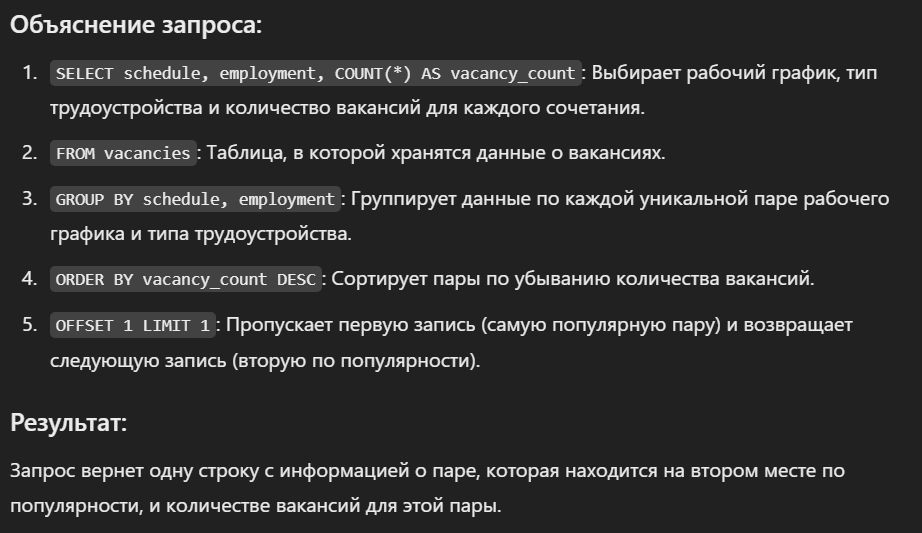

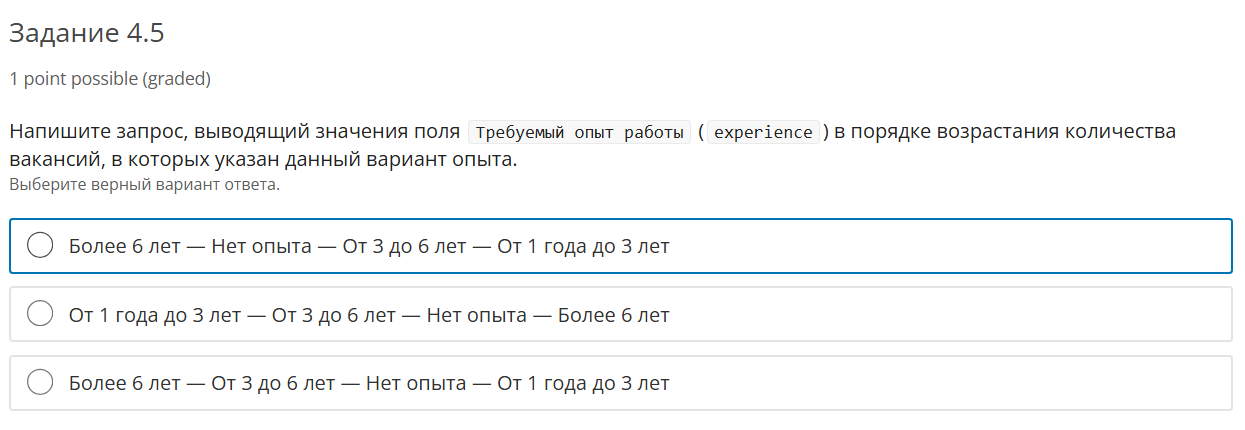

In [20]:
# SQL-запрос
query = """
SELECT
    experience,
    COUNT(*) AS vacancy_count
FROM 
    VACANCIES
GROUP BY
    experience
ORDER BY 
    vacancy_count
"""

In [21]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,experience,vacancy_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


## <center> **5. Анализ работодателей**

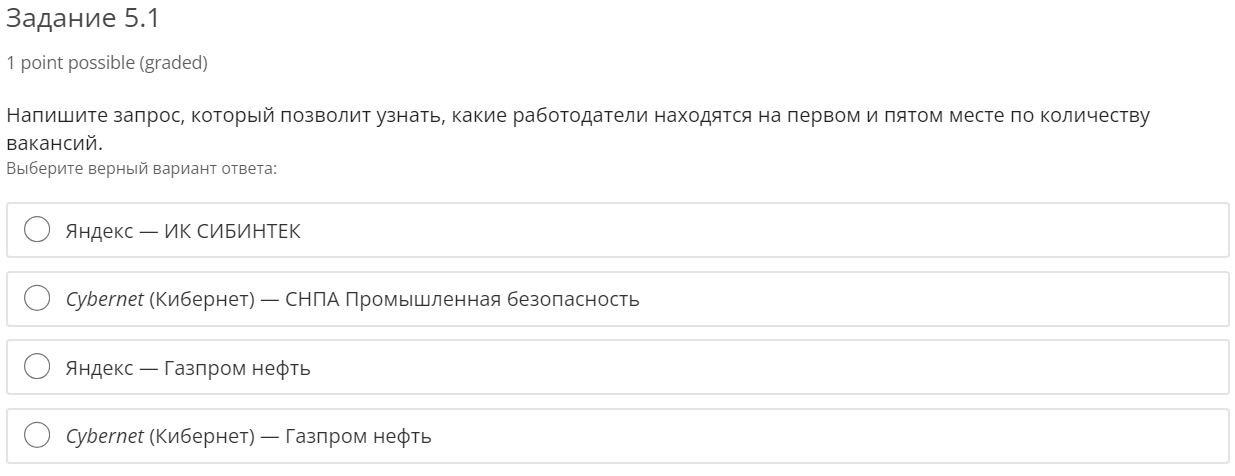

In [22]:
# SQL-запрос
query = """
SELECT 
    e.name AS name_of_employer, 
    COUNT(v.id) AS cnt
FROM 
    EMPLOYERS e
LEFT JOIN 
    VACANCIES v ON e.id = v.employer_id
GROUP BY 
    e.name
ORDER BY 
    cnt DESC;
"""

In [23]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name_of_employer,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
23170,Капитал Лайф Страхование Жизни,0
23171,AGASTONE,0
23172,Независимость,0
23173,Верховный Суд Республики Татарстан,0


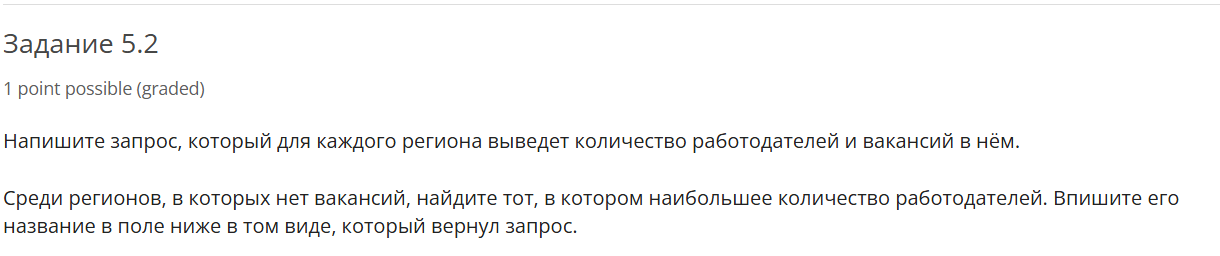

In [24]:
# SQL-запрос
query = """
SELECT 
    a.name AS region_name, 
    COUNT(DISTINCT e.id) AS employer_count
FROM 
    AREAS a
LEFT JOIN 
    EMPLOYERS e ON a.id = e.area
LEFT JOIN 
    VACANCIES v ON a.id = v.area_id
WHERE 
    v.id IS NULL
GROUP BY 
    a.name
ORDER BY 
    employer_count DESC
LIMIT 1;
"""

In [25]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,region_name,employer_count
0,Россия,410


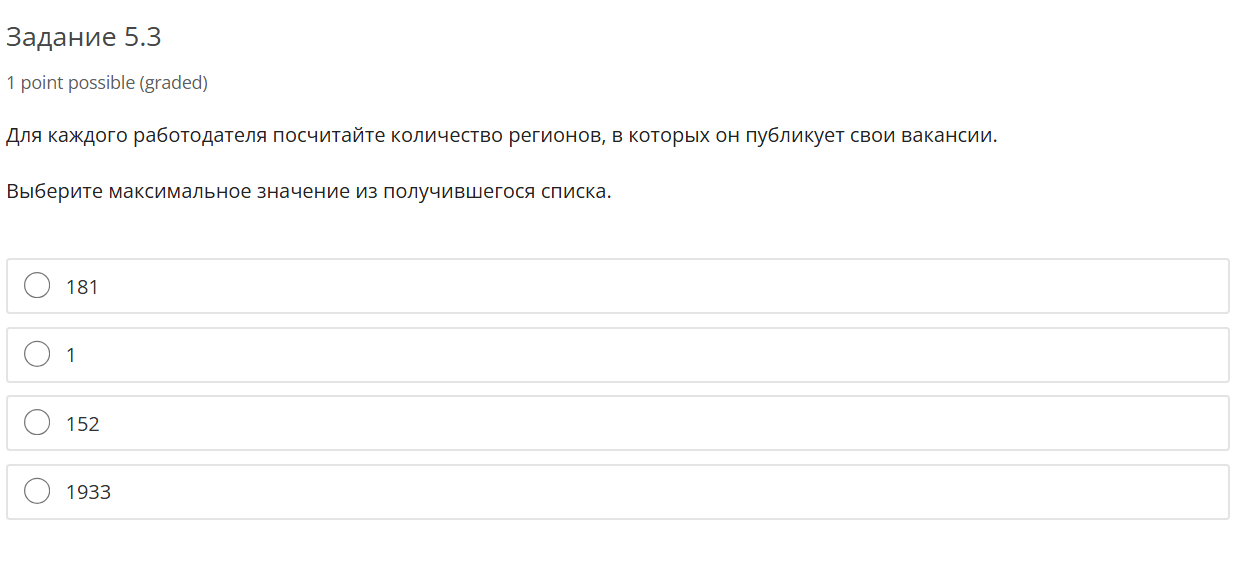

In [26]:
# SQL-запрос
query = """
SELECT 
    employer_id,
    COUNT(DISTINCT area_id) AS region_count
FROM 
    vacancies
GROUP BY 
    employer_id
ORDER BY 
    region_count DESC
LIMIT 1;
""" 

In [27]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employer_id,region_count
0,1740,181


## ✍ Теперь давайте исследуем сферы деятельности работодателей.



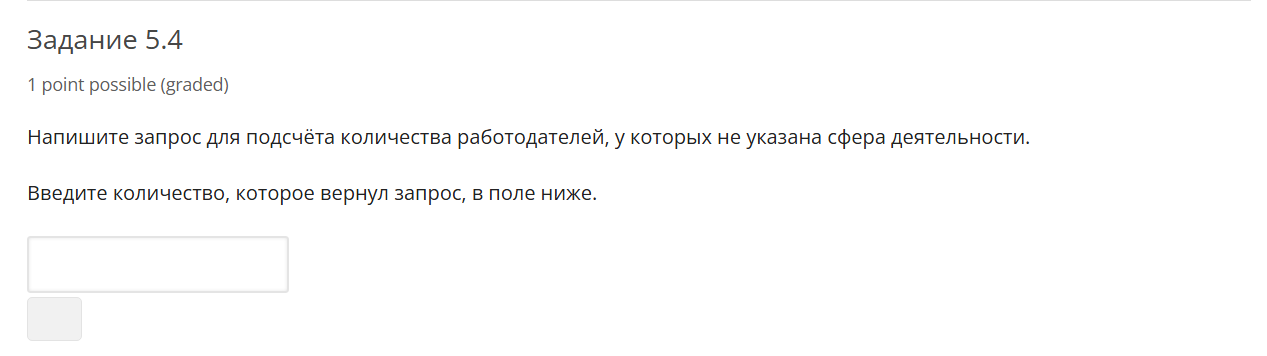

In [28]:
query = """
SELECT *
FROM EMPLOYERS_INDUSTRIES
"""

In [29]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employer_id,industry_id
0,2393,7.540
1,2393,7.539
2,72977,7.540
3,72977,7.539
4,3155,27.550
...,...,...
32328,4718575,7.539
32329,3702770,43.647
32330,2064382,7.541
32331,2064382,7.540


In [30]:
query = """
select count(*) cnt
from employers e
     left join employers_industries ei on e.id = ei.employer_id
where ei.industry_id is null
"""

In [31]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,cnt
0,8419


In [32]:
query = """
SELECT 
    e.name 
FROM 
    EMPLOYERS e
LEFT JOIN 
    EMPLOYERS_INDUSTRIES ei ON e.id = ei.employer_id
GROUP BY 
    e.id
HAVING
    COUNT(ei.industry_id) = 4
ORDER BY 
    e.name
OFFSET 2 LIMIT 1
"""

In [33]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,2ГИС


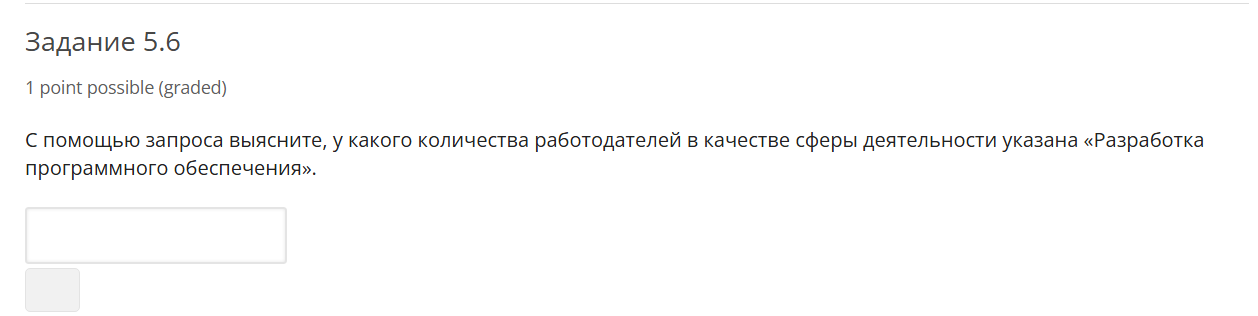

In [41]:
query = """
SELECT 
* 
FROM 
    EMPLOYERS 
"""

In [42]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1
1,72977,БАРС Груп,88
2,3155,"Бест, Торгово-производственная компания, Екате...",3
3,675,КОРУС Консалтинг,2
4,1840010,филиал ФКУ Налог-Сервис ФНС России в Республик...,88
...,...,...,...
23496,1441774,МарКо,88
23497,4718575,MKomov Studio,73
23498,3702770,АКИБ Ипотека-банк,2759
23499,5636092,ГИМ-КЛИНИКА,99


In [43]:
query = """
SELECT 
* 
FROM 
    INDUSTRIES
"""

In [44]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,id,name
0,7.540,Разработка программного обеспечения
1,7.539,"Системная интеграция, автоматизации технологи..."
2,27.550,Безалкогольные напитки (производство)
3,27.551,"Безалкогольные напитки (продвижение, оптовая т..."
4,13.664,Управление и эксплуатация недвижимости
...,...,...
289,37.626,"Ассоциация в сфере культуры, искусства"
290,42.603,Табак (производство)
291,29.532,"Рыболовство, рыбоводство"
292,37.627,Благотворительная организация


In [66]:
# SQL-запрос
query = """
SELECT 
    a.name AS region,
    COUNT(v.id) AS vacancies_count
FROM 
    vacancies AS v
JOIN employers AS e ON v.employer_id = e.id
JOIN areas AS a ON v.area_id = a.id
WHERE 
    e.name = 'Яндекс' AND a.name IN (
        'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
        'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара',
        'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'
    )
GROUP BY 
    a.name

UNION ALL

SELECT 
    'Total' AS region,
    COUNT(v.id) AS vacancies_count
FROM 
    vacancies AS v
JOIN employers AS e ON v.employer_id = e.id
JOIN areas AS a ON v.area_id = a.id
WHERE 
    e.name = 'Яндекс' AND a.name IN (
        'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
        'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара',
        'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'
    )
ORDER BY 
    vacancies_count DESC;
"""

In [67]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,region,vacancies_count
0,Total,485
1,Москва,54
2,Санкт-Петербург,42
3,Екатеринбург,39
4,Нижний Новгород,36
5,Новосибирск,35
6,Воронеж,32
7,Краснодар,30
8,Самара,26
9,Уфа,26


In [68]:
#SELECT 
#    a.name AS region, -- Выбираем название региона (столбец name из таблицы areas) и называем его region.
#    COUNT(v.id) AS vacancies_count -- Считаем количество вакансий (по столбцу id из таблицы vacancies) и называем результат vacancies_count.
#FROM 
#    vacancies AS v -- Используем таблицу vacancies и даем ей псевдоним "v".
#JOIN employers AS e ON v.employer_id = e.id -- Присоединяем таблицу employers с помощью условия, что employer_id в таблице vacancies совпадает с id в таблице employers.
#JOIN areas AS a ON v.area_id = a.id -- Присоединяем таблицу areas, связывая area_id в таблице vacancies с id в таблице areas.
#WHERE 
#    e.name = 'Яндекс' -- Фильтруем строки так, чтобы остались только вакансии, связанные с работодателем "Яндекс".
#    AND a.name IN ( -- Добавляем условие, что регион должен быть одним из списка городов-миллионников.
#        'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
#        'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара',
#        'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'
#    )
#GROUP BY 
#    a.name -- Группируем результаты по названию региона.
#UNION ALL -- Объединяем результаты текущего запроса с результатами следующего. Используем UNION ALL, чтобы включить дубликаты, если таковые есть.
#SELECT 
#    'Total' AS region, -- Вставляем строку с названием "Total" в качестве имени региона.
#    COUNT(v.id) AS vacancies_count -- Считаем общее количество вакансий для "Яндекс" во всех указанных регионах.
#FROM 
#    vacancies AS v -- Используем таблицу vacancies.
#JOIN employers AS e ON v.employer_id = e.id -- Присоединяем таблицу employers с помощью условия, что employer_id в таблице vacancies совпадает с id в таблице employers.
#JOIN areas AS a ON v.area_id = a.id -- Присоединяем таблицу areas, связывая area_id в таблице vacancies с id в таблице areas.
#WHERE 
#    e.name = 'Яндекс' -- Фильтруем строки так, чтобы остались только вакансии, связанные с работодателем "Яндекс".
#    AND a.name IN ( -- Условие, что регион должен быть одним из списка городов-миллионников.
#        'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
#        'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара',
#        'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'
#    )
#ORDER BY 
#    vacancies_count DESC; -- Сортируем результаты в порядке убывания количества вакансий (включая строку Total).


## <center> **6. Предметный анализ**

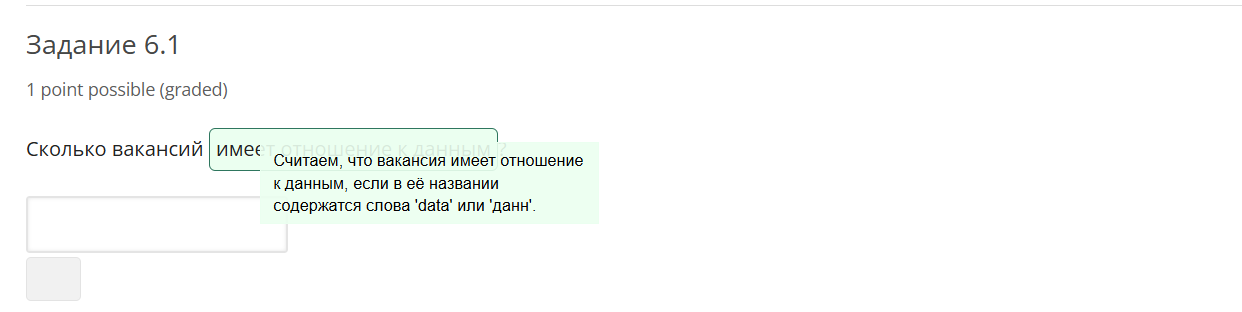

In [73]:
query = """
SELECT 
    COUNT(*)
FROM 
    VACANCIES
WHERE 
    LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
"""

In [74]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1771


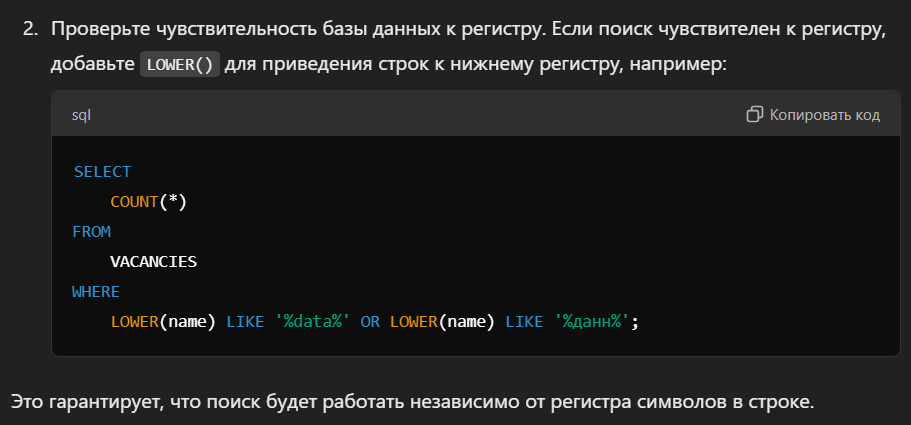

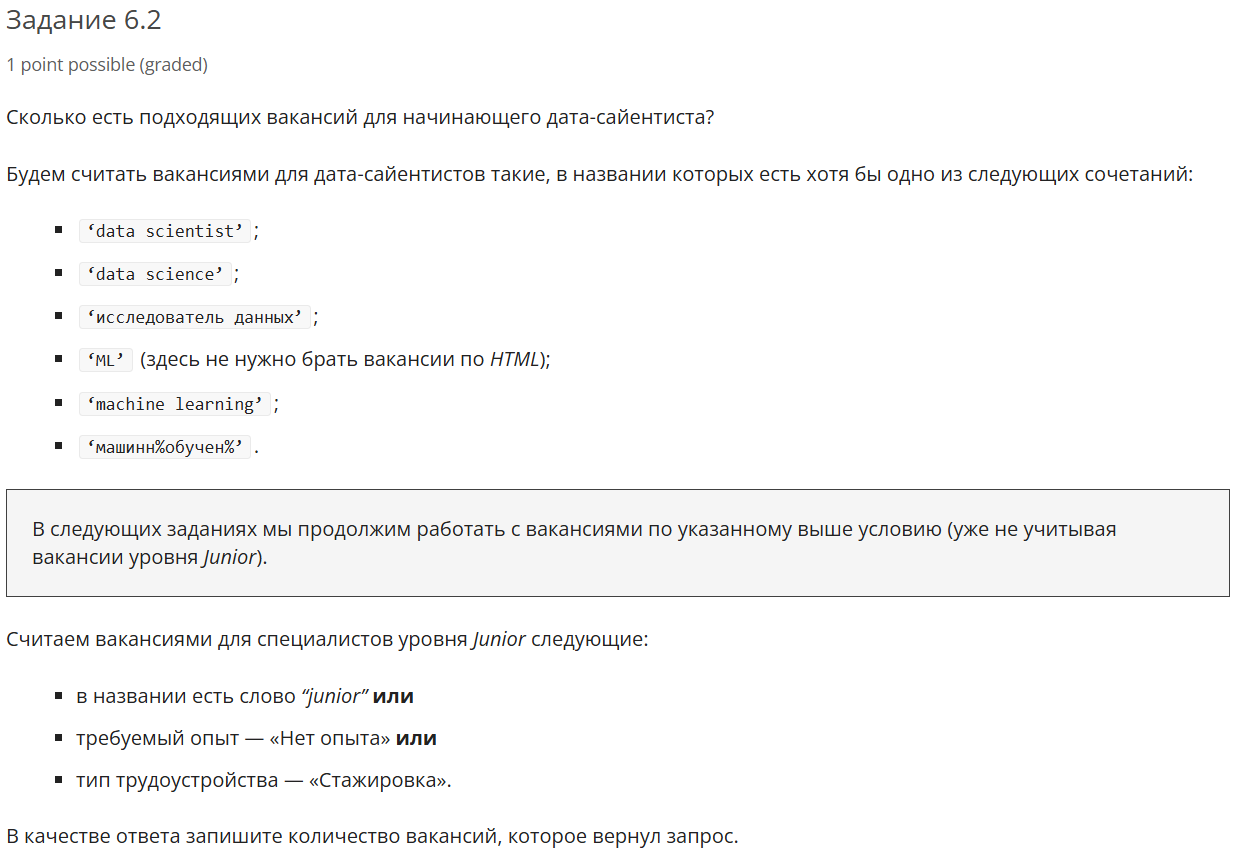

In [77]:
query = """
SELECT 
    COUNT(name) AS vacancies_count
FROM 
    vacancies
WHERE 
    (
        LOWER(name) LIKE '%data scientist%' OR 
        LOWER(name) LIKE '%data science%' OR 
        LOWER(name) LIKE '%исследователь данных%' OR 
        (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR 
        LOWER(name) LIKE '%machine learning%' OR 
        LOWER(name) LIKE '%машинн%обучен%'
    )
    AND (
        LOWER(name) NOT LIKE '%junior%' AND 
        experience NOT LIKE 'Нет опыта' AND 
        employment NOT LIKE 'Стажировка'
    )
"""

In [78]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,vacancies_count
0,429


In [79]:
query = """
SELECT
    COUNT(v.name)

FROM VACANCIES v

WHERE
(
    (name ILIKE '%data scientist%') OR (name ILIKE '%data science%') OR (name ILIKE '%исследователь данных%')
    OR ((name ILIKE '%ML%') AND (name NOT ILIKE '%HTML%'))
    OR (name ILIKE '%machine learning%')
    OR (name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)

    AND (v.name ILIKE '%junior%'
    OR v.experience ILIKE '%Нет опыта%'
    OR v.employment ILIKE '%Стажировка%')
"""

In [80]:
df = pd.read_sql_query(query, connection)
df

C:\Users\roman\AppData\Local\Temp\ipykernel_3348\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,51
